#0. Setting

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [3]:
loans=pd.read_stata("/content/drive/MyDrive/빅데이터 핀테크 전문가/lendingclub.dta")

In [4]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,addr_state1,addr_state2,addr_state3,addr_state4,addr_state5,addr_state6,addr_state7,addr_state8,addr_state9,addr_state10,addr_state11,addr_state12,addr_state13,addr_state14,addr_state15,addr_state16,addr_state17,addr_state18,addr_state19,addr_state20,addr_state21,addr_state22,addr_state23,addr_state24,addr_state25,addr_state26,addr_state27,addr_state28,addr_state29,addr_state30,addr_state31,addr_state32,addr_state33,addr_state34,addr_state35,addr_state36,addr_state37,addr_state38,addr_state39,addr_state40,addr_state41,addr_state42,addr_state43,addr_state44,addr_state45,addr_state46,addr_state47,addr_state48,addr_state49,addr_state50,addr_state51,initial_list_status1,initial_list_status2,elapsed_t,issue_d1,issue_d2,issue_d3,issue_d4,issue_d5,issue_d6,issue_d7,issue_d8,issue_d9,issue_d10,issue_d11,issue_d12,issue_d13,issue_d14,issue_d15,issue_d16,issue_d17,issue_d18,issue_d19,issue_d20,issue_d21,issue_d22,issue_d23,issue_d24,issue_d25,issue_d26,issue_d27,issue_d28,issue_d29,issue_d30,issue_d31,issue_d32,issue_d33,issue_d34,issue_d35,issue_d36,issue_d37,issue_d38,issue_d39,issue_d40,issue_d41,issue_d42,issue_d43,issue_d44,issue_d45,issue_d46,issue_d47,issue_d48,issue_d49,issue_d50,issue_d51,issue_d52,issue_d53,issue_d54,issue_d55,issue_d56,issue_d57,issue_d58,issue_d59,issue_d60,issue_d61,issue_d62,issue_d63,issue_d64,issue_d65,issue_d66,issue_d67,issue_d68,issue_d69,issue_d70,issue_d71,issue_d72,issue_d73,issue_d74,issue_d75,issue_d76,issue_d77,issue_d78,issue_d79,issue_d80,issue_d81,issue_d82,issue_d83,issue_d84,issue_d85,issue_d86,issue_d87,issue_d88,issue_d89,issue_d90,issue_d91,issue_d92,issue_d93,issue_d94,issue_d95,issue_d96,issue_d97,issue_d98,issue_d99,issue_d100,issue_d101,issue_d102,issue_d103,issue_d104,issue_d105,issue_d106,issue_d107,issue_d108,issue_d109,issue_d110,issue_d111,issue_d112,issue_d113,issue_d114,issue_d115,issue_d116,issue_d117,issue_d118,debt_settlement_flag1,term1,depvar,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,mths_since_last_major_derog1,mths_since_last_major_derog2,mths_since_last_major_derog3,mths_since_last_major_derog4,mths_since_last_major_derog5,mths_since_last_major_derog6,mths_since_last_major_derog7,mths_since_last_major_derog8,mths_since_last_major_derog9,mths_since_last_major_derog10,mths_since_last_major_derog11,mths_since_last_record1,mths_since_last_record2,mths_since_last_record3,mths_since_last_record4,mths_since_last_record5,mths_since_last_record6,mths_since_last_record7,mths_since_last_record8,mths_since_last_record9,mths_since_last_record10,mths_since_last_record11,mths_since_rcnt_il1,mths_since_rcnt_il2,mths_since_rcnt_il3,mths_since_rcnt_il4,mths_since_rcnt_il5,mths_since_rcnt_il6,mths_since_rcnt_il7,mths_since_rcnt_il8,mths_since_rcnt_il9,mths_since_rcnt_il10,mths_since_rcnt_il11,mths_since_recent_bc1,mths_since_recent_bc2,mths

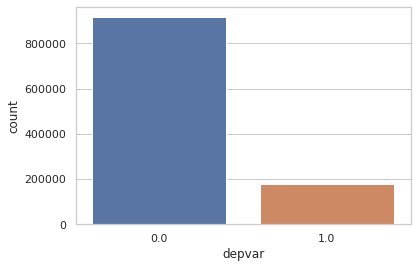

In [5]:
ax = sns.countplot(x="depvar", data=loans)

#1. Exploratory Data Analsis

In [ ]:
def plot_hist(col):
  sns.distplot(loans[loans.depvar == 0][col], color="blue", label="Full Paid")
  sns.distplot(loans[loans.depvar == 1][col], color="red", label="Charged Off")
  plt.legend(title="Loan Status")

def box(col):
  sns.boxplot(x="depvar", y=col, data=loans)

def total_plot(col):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  plot_hist(col)

  plt.subplot(1,2,2)
  box(col)

  plt.tight_layout()
  plt.show()

1. loan amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


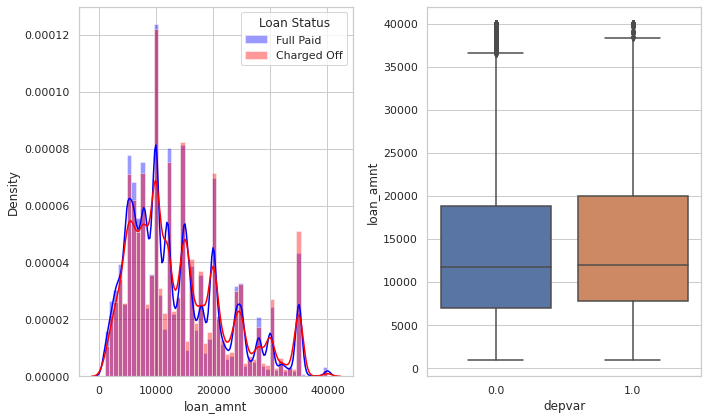

In [ ]:
total_plot('loan_amnt')

In [ ]:
loans.groupby(by='depvar')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,13554.392230,8427.131877,1000.0,7000.0,11700.0,18825.0,40000.0
1.0,176824.0,14122.470649,8497.606175,1000.0,7775.0,12000.0,20000.0,40000.0


In [ ]:
loans.drop(columns=['loan_amnt','funded_amnt','funded_amnt_inv'],axis = 1, inplace= True)

사실상 차이가 거의 나타나지 않았음

2. int rate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


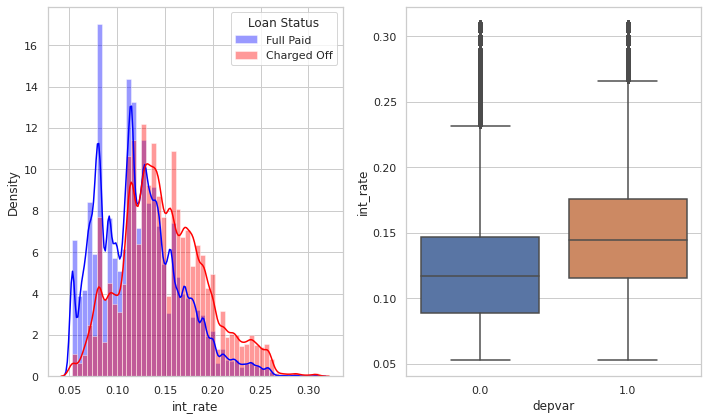

In [ ]:
total_plot("int_rate")

In [ ]:
loans.groupby(by='depvar')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,0.122105,0.042173,0.0532,0.0890,0.1167,0.1465,0.3099
1.0,176824.0,0.148605,0.044240,0.0532,0.1153,0.1446,0.1757,0.3099


In [ ]:
loans['depvar'].corr(loans['int_rate'])

0.2237213815997182

int rate는 확실한 차이가 들어남, corr도 0.22로 다른 변수 대비 크게 나타남

3. installment

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


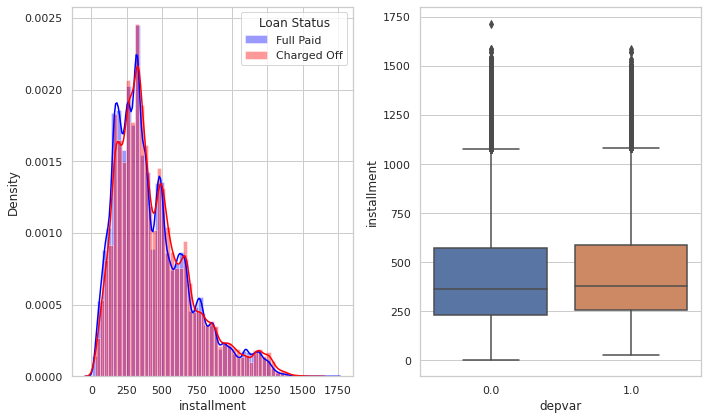

In [ ]:
total_plot('installment')

In [ ]:
loans.groupby(by='depvar')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,428.177841,264.523644,4.93,233.10,361.33,570.37,1715.42
1.0,176824.0,447.187077,268.410157,27.85,255.04,377.37,585.36,1584.90


In [ ]:
loans.drop(columns='installment',axis = 1, inplace= True)

4. Annual Income

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


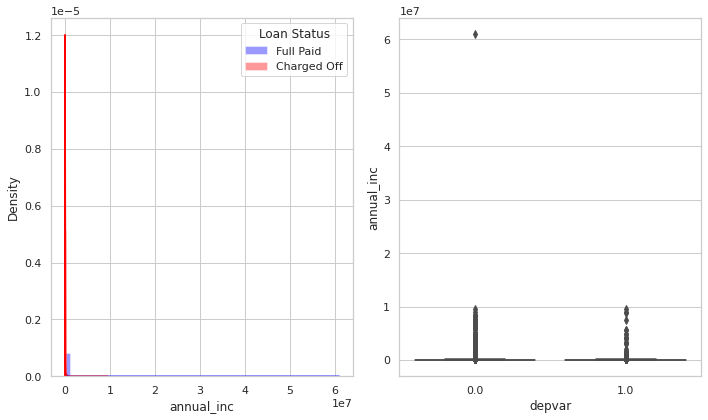

In [ ]:
total_plot('annual_inc')

In [ ]:
loans = loans[loans['annual_inc'] <= 250000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


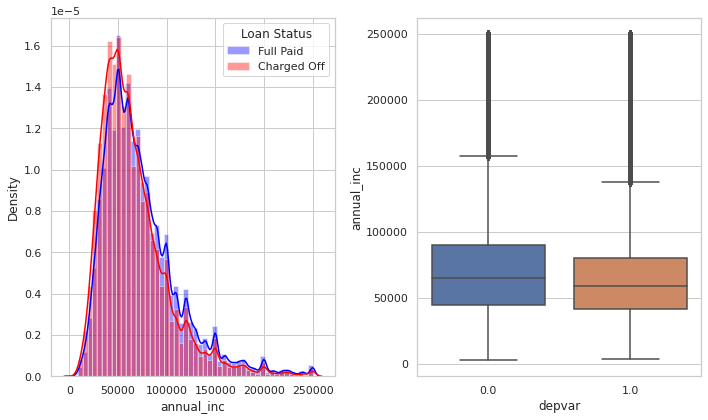

In [ ]:
total_plot('annual_inc')

In [ ]:
loans.groupby(by='depvar')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,905922.0,73183.466080,39005.727891,3000.0,45000.0,65000.0,90000.0,250000.0
1.0,175643.0,66089.058573,35775.187887,4000.0,41500.0,58943.0,80000.0,250000.0


In [ ]:
loans.drop(columns='annual_inc',axis = 1, inplace= True)

5. dti

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


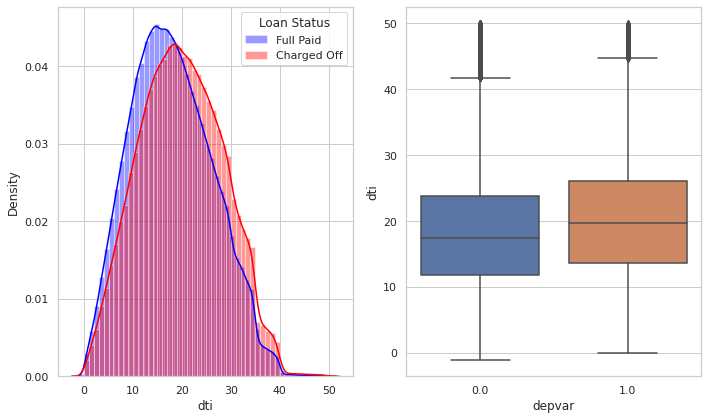

In [ ]:
total_plot('dti')

In [ ]:
loans.groupby(by='depvar')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,905922.0,17.949533,8.236808,-1.0,11.75,17.41,23.76,49.96
1.0,175643.0,19.870815,8.456851,0.0,13.60,19.66,26.07,49.93


In [ ]:
loans['depvar'].corr(loans['dti'])

0.08533999214779969

6. delinq 2yr

In [ ]:
loans = loans[loans['delinq_2yrs'] <= 8]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


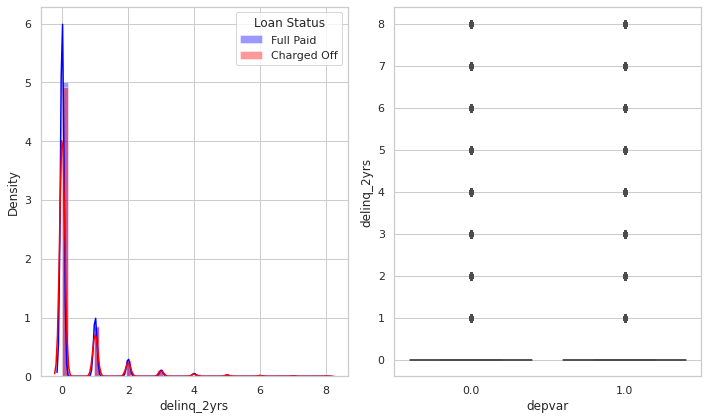

In [ ]:
total_plot('delinq_2yrs')

In [ ]:
loans['depvar'][loans['delinq_2yrs']==0].value_counts(normalize=True)

0.0    0.83958
1.0    0.16042
Name: depvar, dtype: float64

In [ ]:
loans.groupby(by='depvar')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,904872.0,0.320760,0.812129,0.0,0.0,0.0,0.0,8.0
1.0,175394.0,0.348712,0.856537,0.0,0.0,0.0,0.0,8.0


In [ ]:
loans.drop(columns='delinq_2yrs',axis = 1, inplace= True)

7. fico range high/low

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


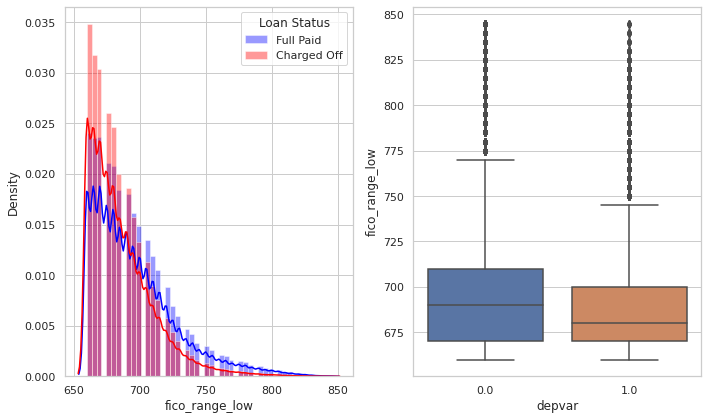

In [ ]:
total_plot('fico_range_low')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


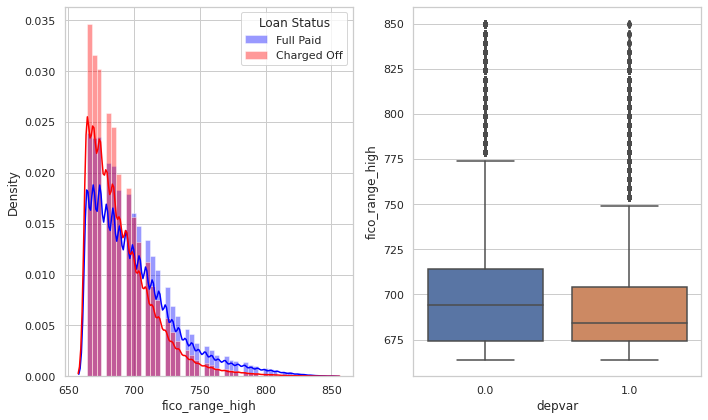

In [ ]:
total_plot('fico_range_high')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


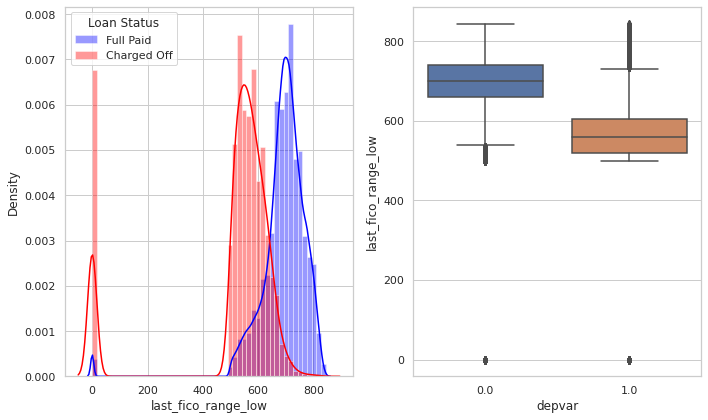

In [ ]:
total_plot('last_fico_range_low')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


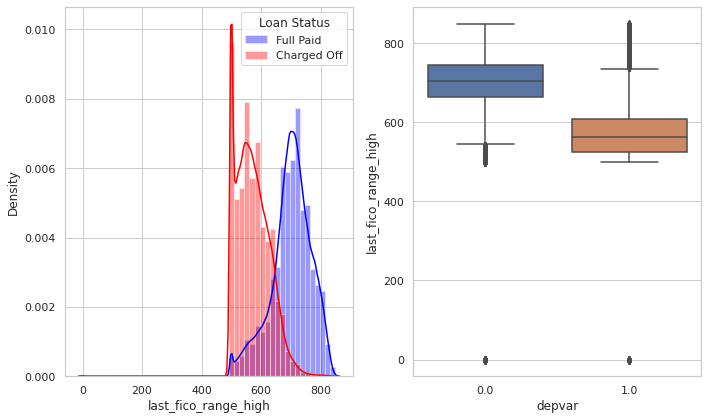

In [ ]:
total_plot('last_fico_range_high')

In [ ]:
loans.groupby(by='depvar')['fico_range_low'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,904872.0,695.767451,31.361011,660.0,670.0,690.0,710.0,845.0
1.0,175394.0,686.005280,24.374549,660.0,670.0,680.0,700.0,845.0


In [ ]:
loans.groupby(by='depvar')['fico_range_low'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,904872.0,695.767451,31.361011,660.0,670.0,690.0,710.0,845.0
1.0,175394.0,686.005280,24.374549,660.0,670.0,680.0,700.0,845.0


In [ ]:
loans.drop(columns=['fico_range_low','fico_range_high'],axis = 1, inplace=True)

fico range의 경우 last fico range와 겹치고, 변수로써도 last fico range가 더 나아서 제거함

8. 기타 변수

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


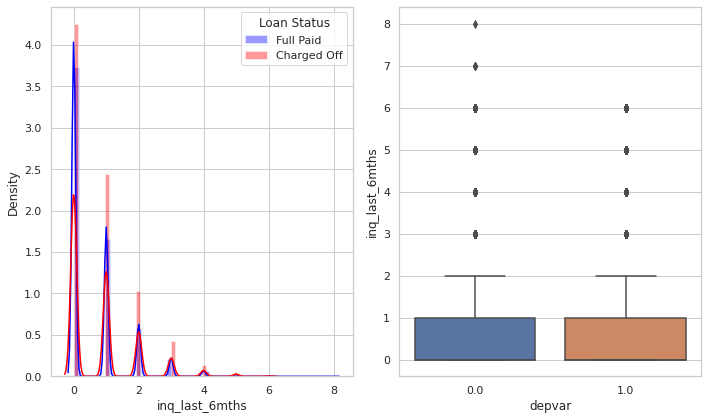

In [ ]:
total_plot('inq_last_6mths')

In [ ]:
loans.groupby(by='depvar')['inq_last_6mths'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,904872.0,0.608316,0.909116,0.0,0.0,0.0,1.0,8.0
1.0,175394.0,0.793169,1.029372,0.0,0.0,0.0,1.0,6.0


In [ ]:
loans = loans[loans['pub_rec'] <= 6]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


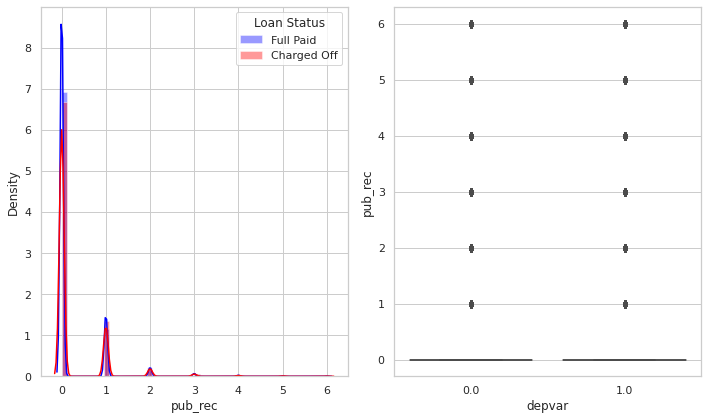

In [ ]:
total_plot('pub_rec')

In [ ]:
loans.groupby(by='depvar')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,0.221383,0.625032,0.0,0.0,0.0,0.0,63.0
1.0,176824.0,0.261135,0.711729,0.0,0.0,0.0,0.0,86.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


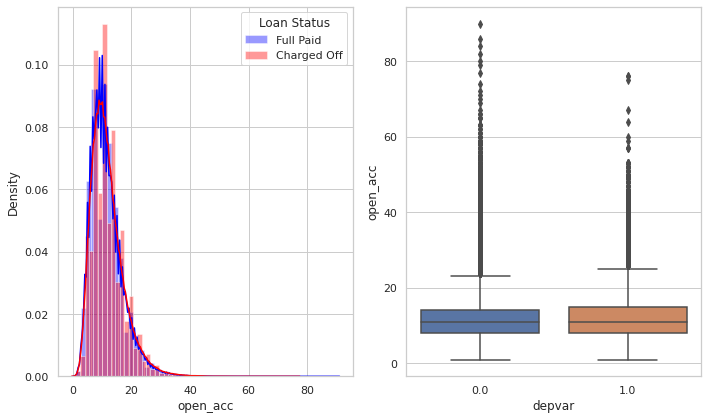

In [ ]:
total_plot('open_acc')

In [ ]:
loans = loans[loans['revol_bal'] <= 0.2]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


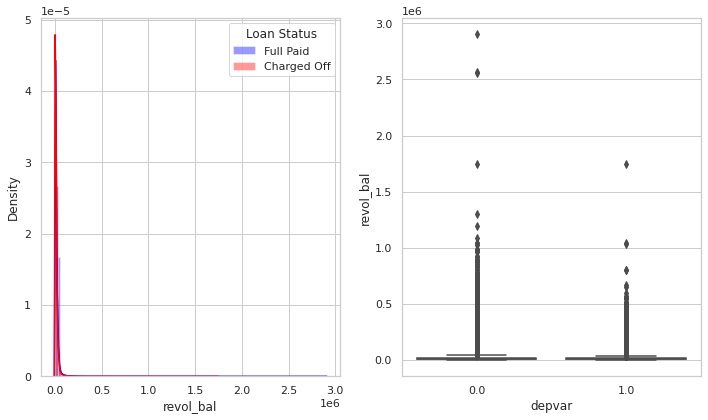

In [ ]:
total_plot('revol_bal')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


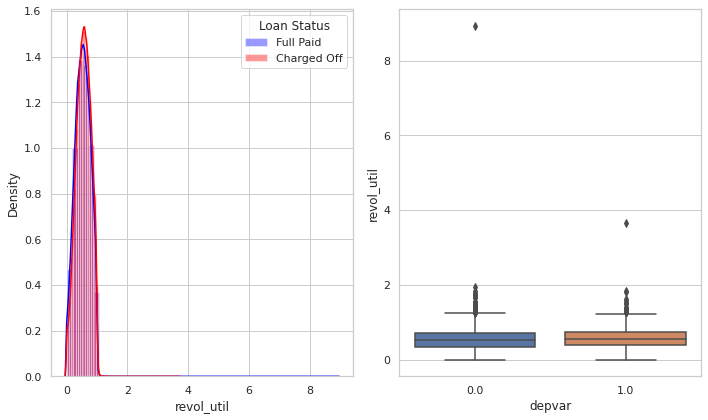

In [ ]:
total_plot('revol_util')

In [ ]:
loans.groupby(by='depvar')['revol_bal'].value_counts(normalize=True)

In [ ]:
loans.drop(columns='revol_bal',axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


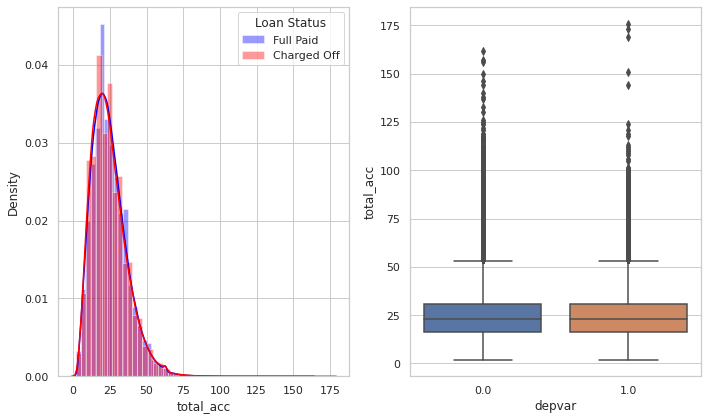

In [ ]:
total_plot('total_acc')

In [ ]:
loans.groupby(by='depvar')['out_prncp_inv'].value_counts()

depvar  out_prncp_inv
0.0     0.0              2584
1.0     0.0               400
Name: out_prncp_inv, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


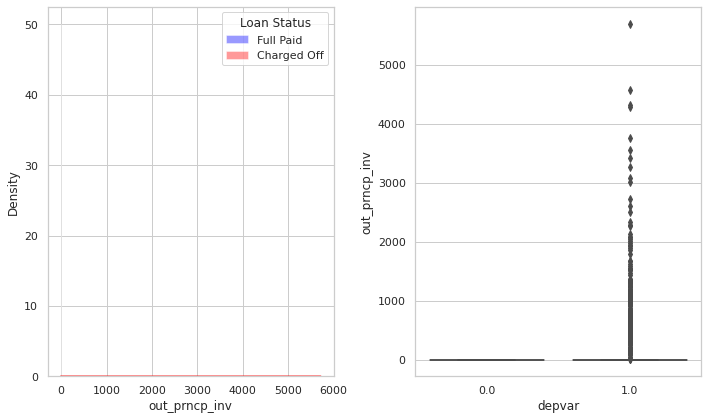

In [ ]:
total_plot('out_prncp_inv')

In [ ]:
loans.groupby(by='depvar')['out_prncp_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,904762.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
1.0,175361.0,0.992056,41.933421,0.0,0.0,0.0,0.0,5702.63


In [ ]:
loans.drop(columns='out_prncp_inv',axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


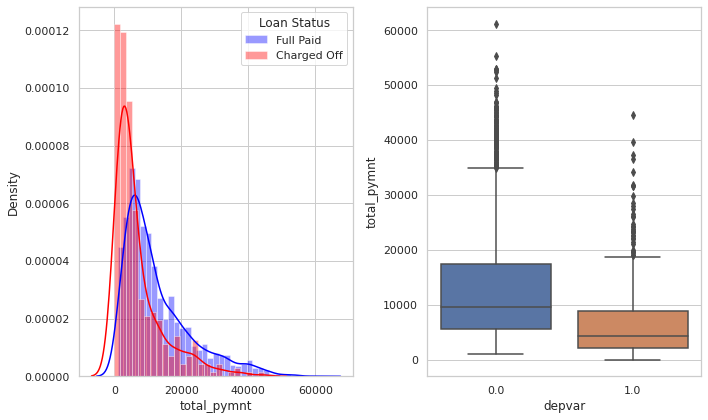

In [ ]:
total_plot('total_pymnt')

In [ ]:
loans.groupby(by='depvar')['total_pymnt'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,16004.170115,10384.891398,1000.0,8137.156504,13210.77002,21867.121045,63551.09498
1.0,176824.0,9102.229277,7450.613253,0.0,3794.010000,7003.43500,12165.140000,61947.52980


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


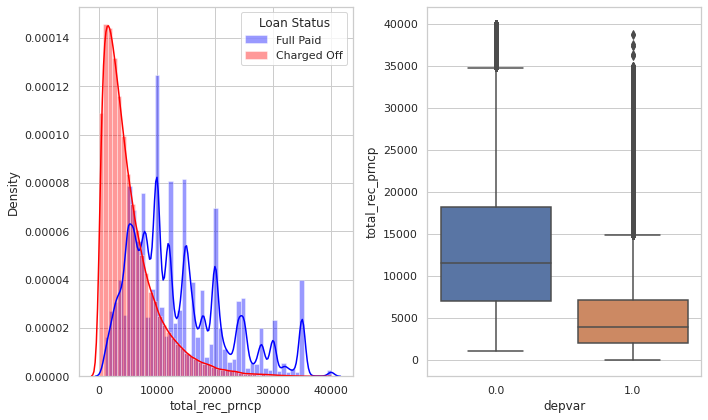

In [ ]:
total_plot('total_rec_prncp')

In [ ]:
loans.groupby(by='depvar')['total_rec_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,13554.377226,8427.130553,999.99,7000.0000,11700.00,18825.000,40000.00
1.0,176824.0,5290.453618,4794.853256,0.00,1915.5975,3884.05,7127.785,38694.07


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


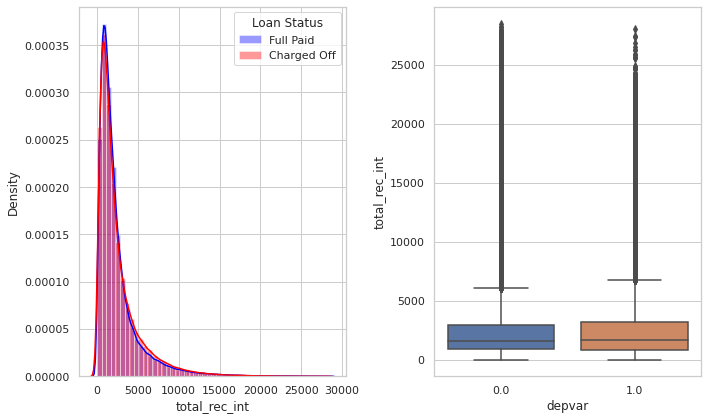

In [ ]:
total_plot('total_rec_int')

In [ ]:
loans.groupby(by='depvar')['total_rec_int'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,2448.625480,2662.541834,0.0,863.6000,1610.28,2953.93,28499.14
1.0,176824.0,2556.643978,2727.150651,0.0,837.1275,1637.88,3227.91,28005.96


In [ ]:
loans.drop(columns = 'total_rec_int',axis = 1, inplace = True)

In [ ]:
loans.groupby(by='depvar')['total_rec_late_fee'].value_counts(normalize=True)

depvar  total_rec_late_fee
0.0     0.000000              0.964783
        15.000000             0.011610
        30.000000             0.003096
        45.000000             0.001548
        15.000000             0.001161
        15.140000             0.000387
        15.250000             0.000387
        15.250000             0.000387
        15.670000             0.000387
        16.840000             0.000387
        17.250000             0.000387
        17.350000             0.000387
        17.480000             0.000387
        18.140000             0.000387
        19.410000             0.000387
        21.740000             0.000387
        22.930000             0.000387
        25.760000             0.000387
        27.470000             0.000387
        28.240000             0.000387
        30.000000             0.000387
        31.470000             0.000387
        32.990000             0.000387
        33.780000             0.000387
        36.360000             0.00038

In [ ]:
loans['depvar'][loans['total_rec_late_fee']==0].value_counts(normalize=True)

0.0    0.854895
1.0    0.145105
Name: depvar, dtype: float64

In [ ]:
loans.groupby(by='depvar')['total_rec_late_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,1.167390,11.893269,0.000000e+00,0.0,0.0,0.0,1598.52
1.0,176824.0,5.118129,18.576840,-5.100000e-09,0.0,0.0,0.0,874.17


In [ ]:
loans.drop(columns = 'total_rec_late_fee',axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


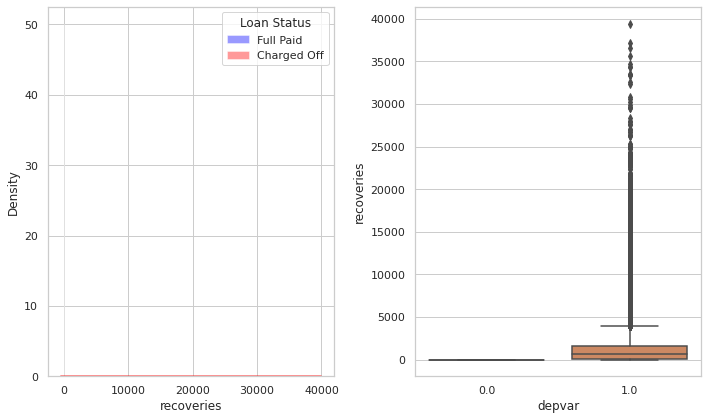

In [ ]:
total_plot('recoveries')

In [ ]:
loans.groupby(by='depvar')['recoveries'].value_counts(normalize=True)

depvar  recoveries
0.0     0.00          1.0000
1.0     0.00          0.2275
        112.95        0.0050
        0.26          0.0025
        2.06          0.0025
        4.80          0.0025
        5.10          0.0025
        11.92         0.0025
        31.57         0.0025
        45.36         0.0025
        52.98         0.0025
        57.06         0.0025
        59.14         0.0025
        60.98         0.0025
        63.32         0.0025
        65.61         0.0025
        68.21         0.0025
        79.98         0.0025
        82.95         0.0025
        83.78         0.0025
        86.49         0.0025
        93.82         0.0025
        97.75         0.0025
        102.38        0.0025
        112.52        0.0025
        119.62        0.0025
        128.69        0.0025
        129.06        0.0025
        129.18        0.0025
        134.12        0.0025
        136.77        0.0025
        138.03        0.0025
        138.89        0.0025
        141.34        0.

In [ ]:
loans.groupby(by='depvar')['recoveries'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,0.000000,0.000000,0.0,0.00,0.000,0.00,0.00
1.0,176824.0,1250.013552,1876.477348,0.0,55.92,671.955,1630.22,39444.37


In [ ]:
loans.drop(columns = 'recoveries',axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


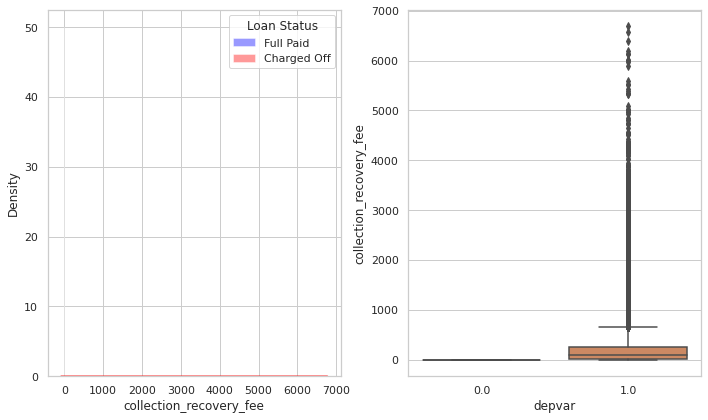

In [ ]:
total_plot('collection_recovery_fee')

In [ ]:
loans.groupby(by='depvar')['collection_recovery_fee'].value_counts(normalize=True)

depvar  collection_recovery_fee
0.0     0.0000                     1.0000
1.0     0.0000                     0.2450
        20.3310                    0.0050
        720.0000                   0.0050
        1.4134                     0.0025
        2.6142                     0.0025
        2.7103                     0.0025
        3.7200                     0.0025
        3.7363                     0.0025
        3.9300                     0.0025
        5.2100                     0.0025
        5.3406                     0.0025
        5.6826                     0.0025
        8.1648                     0.0025
        8.6694                     0.0025
        9.5364                     0.0025
        10.1893                    0.0025
        10.2708                    0.0025
        10.3914                    0.0025
        10.5000                    0.0025
        10.6452                    0.0025
        11.0769                    0.0025
        11.3875                    0.0025
  

In [ ]:
loans.groupby(by='depvar')['collection_recovery_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,0.000000,0.000000,0.0,0.0,0.0000,0.00,0.0000
1.0,176824.0,207.790486,333.408919,0.0,4.5,99.5697,264.87,6687.6228


In [ ]:
loans.drop(columns = 'collection_recovery_fee',axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


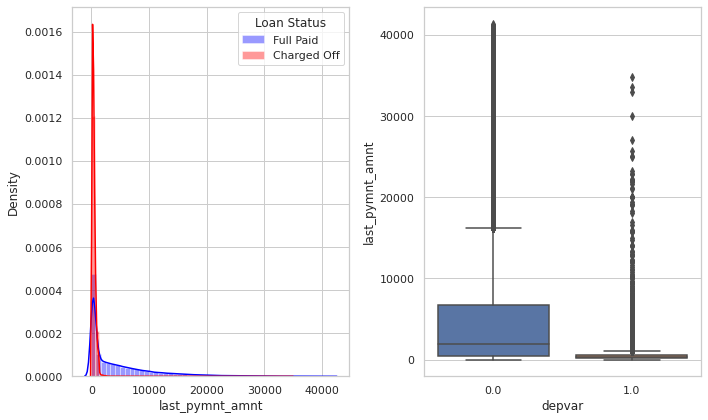

In [ ]:
total_plot('last_pymnt_amnt')

In [ ]:
loans.groupby(by='depvar')['last_pymnt_amnt'].value_counts(normalize=True)

In [ ]:
loans.groupby(by='depvar')['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
depvar,,,,,,,,
0.0,916095.0,4585.831880,5995.804409,0.0,387.445,1956.12,6729.11,41399.44
1.0,176824.0,451.323199,493.725483,0.0,230.940,363.82,578.68,34833.35


In [ ]:
loans.groupby(by='depvar')['collections_12_mths_ex_med'].value_counts(normalize=True)

depvar  collections_12_mths_ex_med
0.0     0                             0.979489
        1                             0.018963
        2                             0.001161
        16                            0.000387
1.0     0                             0.977500
        1                             0.020000
        2                             0.002500
Name: collections_12_mths_ex_med, dtype: float64

In [ ]:
loans['collections_12_mths_ex_med'].value_counts(normalize=True).head()

0    0.983660
1    0.015144
2    0.001006
3    0.000118
4    0.000039
Name: collections_12_mths_ex_med, dtype: float64

In [ ]:
loans.groupby(by='depvar')['acc_now_delinq'].value_counts(normalize=True)

depvar  acc_now_delinq
0.0     0                 0.990712
        1                 0.009288
1.0     0                 0.990000
        1                 0.010000
Name: acc_now_delinq, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


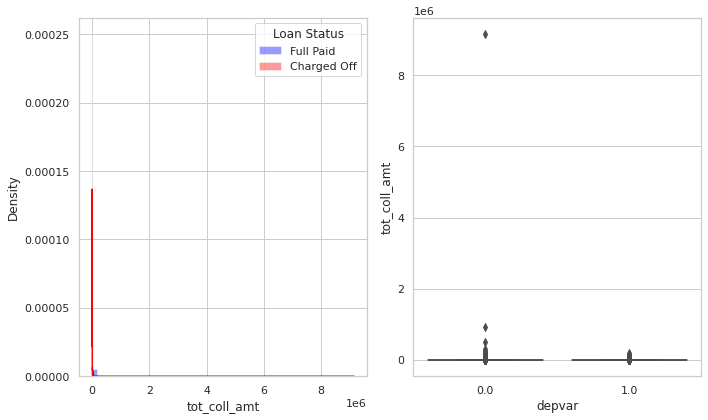

In [ ]:
total_plot('tot_coll_amt')

In [ ]:
loans.groupby(by='depvar')['tot_coll_amt'].value_counts(normalize=True)

In [ ]:
loans = loans[loans['tot_cur_bal']<1]

In [ ]:
loans.groupby(by='depvar')['tot_cur_bal'].value_counts(normalize=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
loans.groupby(by='depvar')['chargeoff_within_12_mths'].value_counts(normalize=True)

depvar  chargeoff_within_12_mths
0.0     0                           0.984496
        1                           0.015504
1.0     0                           1.000000
Name: chargeoff_within_12_mths, dtype: float64

In [ ]:
loans.drop(columns='chargeoff_within_12_mths',axis=1,inplace=True)

In [ ]:
loans.groupby(by='depvar')['delinq_amnt'].value_counts(normalize=True)

depvar  delinq_amnt
0.0     0              1.0
1.0     0              1.0
Name: delinq_amnt, dtype: float64

In [ ]:
loans.drop(columns='delinq_amnt',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


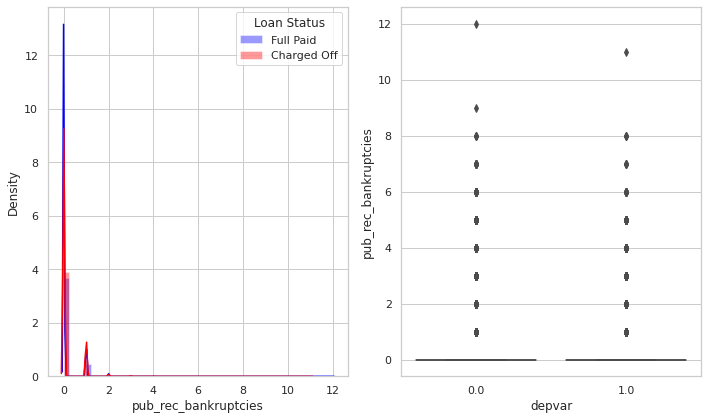

In [ ]:
total_plot('pub_rec_bankruptcies')

In [ ]:
loans.groupby(by='depvar')['pub_rec_bankruptcies'].value_counts(normalize=True)

depvar  pub_rec_bankruptcies
0.0     0                       0.922481
        1                       0.062016
        2                       0.007752
        3                       0.007752
1.0     0                       0.909091
        1                       0.090909
Name: pub_rec_bankruptcies, dtype: float64

In [ ]:
loans['depvar'].corr(loans['pub_rec_bankruptcies'])

0.025926852615444206

In [ ]:
loans.drop(columns='pub_rec_bankruptcies',axis=1,inplace=True)

In [ ]:
loans.groupby(by='depvar')['tax_liens'].value_counts(normalize=True)

depvar  tax_liens
0.0     0            0.953488
        1            0.023256
        2            0.023256
1.0     0            0.939394
        1            0.060606
Name: tax_liens, dtype: float64

In [ ]:
loans['depvar'].corr(loans['tax_liens'])

0.006021235879604436

In [ ]:
loans.drop(columns='tax_liens',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


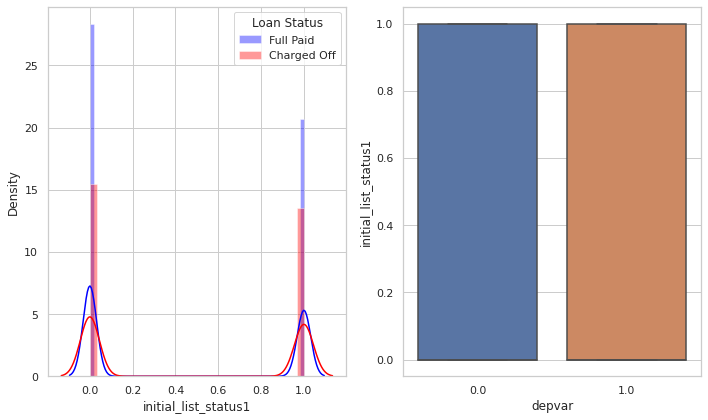

In [ ]:
total_plot('initial_list_status1')

In [ ]:
loans.groupby(by='depvar')['initial_list_status1'].value_counts(normalize=True)

depvar  initial_list_status1
0.0     0                       0.503876
        1                       0.496124
1.0     1                       0.545455
        0                       0.454545
Name: initial_list_status1, dtype: float64

In [ ]:
loans.drop(columns='initial_list_status1',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


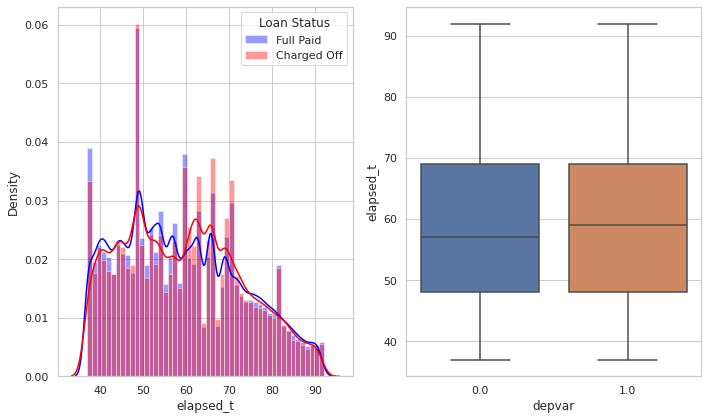

In [ ]:
total_plot('elapsed_t')

In [ ]:
loans['depvar'].corr(loans['elapsed_t'])

0.011921015704939955

In [ ]:
loans.groupby(by='depvar')['debt_settlement_flag1'].value_counts(normalize=True)

depvar  debt_settlement_flag1
0.0     1                        1.000000
1.0     1                        0.939394
        0                        0.060606
Name: debt_settlement_flag1, dtype: float64

In [ ]:
loans['depvar'].corr(loans['debt_settlement_flag1'])

-0.3522078240370882

In [ ]:
loans.groupby(by='depvar')['term1'].value_counts(normalize=True)

depvar  term1
0.0     1        0.914729
        0        0.085271
1.0     1        0.909091
        0        0.090909
Name: term1, dtype: float64

In [ ]:
loans['depvar'].corr(loans['term1'])

-0.1067421245800217

In [ ]:
loans.shape

(1092919, 25)

#features

####features list

In [6]:
#더미변수 정리
addr_list = ['addr_state1', 'addr_state10', 'addr_state11', 'addr_state12', 'addr_state13', 'addr_state14', 'addr_state15', 'addr_state16', 'addr_state17', 'addr_state18', 'addr_state19', 'addr_state2', 'addr_state20',
             'addr_state21', 'addr_state22', 'addr_state23', 'addr_state24', 'addr_state25', 'addr_state26', 'addr_state27', 'addr_state28', 'addr_state29', 'addr_state3', 'addr_state30', 'addr_state31', 'addr_state32',
             'addr_state33', 'addr_state34', 'addr_state35', 'addr_state36', 'addr_state37', 'addr_state38', 'addr_state39', 'addr_state4', 'addr_state40', 'addr_state41', 'addr_state42', 'addr_state43', 'addr_state44',
             'addr_state45', 'addr_state46', 'addr_state47', 'addr_state48', 'addr_state49', 'addr_state5', 'addr_state50', 'addr_state51', 'addr_state6', 'addr_state7', 'addr_state8', 'addr_state9']

emp_list = ['emp_length1','emp_length10', 'emp_length11', 'emp_length12', 'emp_length2', 'emp_length3', 'emp_length4', 
            'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9']

home_list = ['home_ownership1', 'home_ownership2', 'home_ownership3', 'home_ownership4', 'home_ownership5', 'home_ownership6']

issue_list = ['issue_d1', 'issue_d10', 'issue_d100', 'issue_d101', 'issue_d102', 'issue_d103', 'issue_d104', 'issue_d105', 'issue_d106', 'issue_d107', 'issue_d108', 'issue_d109', 'issue_d11', 
              'issue_d110', 'issue_d111', 'issue_d112', 'issue_d113', 'issue_d114', 'issue_d115','issue_d116', 'issue_d117', 'issue_d118', 'issue_d12', 'issue_d13', 'issue_d14', 'issue_d15', 'issue_d16', 'issue_d17', 'issue_d18', 'issue_d19', 
              'issue_d2', 'issue_d20', 'issue_d21', 'issue_d22', 'issue_d23', 'issue_d24', 'issue_d25', 'issue_d26', 'issue_d27','issue_d28', 'issue_d29', 'issue_d3', 'issue_d30', 'issue_d31', 'issue_d32', 'issue_d33', 'issue_d34', 'issue_d35',
              'issue_d36', 'issue_d37', 'issue_d38', 'issue_d39', 'issue_d4', 'issue_d40', 'issue_d41', 'issue_d42', 'issue_d43', 'issue_d44', 'issue_d45', 'issue_d46','issue_d47', 'issue_d48', 'issue_d49', 'issue_d5', 'issue_d50', 'issue_d51',
              'issue_d52', 'issue_d53', 'issue_d54', 'issue_d55', 'issue_d56', 'issue_d57', 'issue_d58', 'issue_d59', 'issue_d6', 'issue_d60', 'issue_d61', 'issue_d62', 'issue_d63', 'issue_d64', 'issue_d65','issue_d66', 'issue_d67', 'issue_d68', 
              'issue_d69', 'issue_d7', 'issue_d70', 'issue_d71', 'issue_d72', 'issue_d73', 'issue_d74', 'issue_d75', 'issue_d76', 'issue_d77', 'issue_d78', 'issue_d79', 'issue_d8', 'issue_d80', 'issue_d81', 'issue_d82', 'issue_d83', 'issue_d84',
              'issue_d85', 'issue_d86', 'issue_d87', 'issue_d88', 'issue_d89', 'issue_d9', 'issue_d90', 'issue_d91', 'issue_d92', 'issue_d93', 'issue_d94', 'issue_d95', 'issue_d96', 'issue_d97', 'issue_d98', 'issue_d99']

mnth_de_list = [ 'mths_since_last_delinq1', 'mths_since_last_delinq10', 'mths_since_last_delinq11', 'mths_since_last_delinq2', 'mths_since_last_delinq3',
                'mths_since_last_delinq4', 'mths_since_last_delinq5', 'mths_since_last_delinq6', 'mths_since_last_delinq7', 'mths_since_last_delinq8', 'mths_since_last_delinq9']

mnth_major_list = ['mths_since_last_major_derog1', 'mths_since_last_major_derog10', 'mths_since_last_major_derog11', 'mths_since_last_major_derog2', 'mths_since_last_major_derog3', 'mths_since_last_major_derog4', 
                   'mths_since_last_major_derog5','mths_since_last_major_derog6', 'mths_since_last_major_derog7', 'mths_since_last_major_derog8', 'mths_since_last_major_derog9']

mnth_record = [ 'mths_since_last_record1', 'mths_since_last_record10', 'mths_since_last_record11', 'mths_since_last_record2', 'mths_since_last_record3', 'mths_since_last_record4', 'mths_since_last_record5',
               'mths_since_last_record6', 'mths_since_last_record7', 'mths_since_last_record8', 'mths_since_last_record9']

mnth_rcnt = [ 'mths_since_rcnt_il1', 'mths_since_rcnt_il10', 'mths_since_rcnt_il11', 'mths_since_rcnt_il2', 'mths_since_rcnt_il3', 'mths_since_rcnt_il4', 'mths_since_rcnt_il5', 'mths_since_rcnt_il6', 'mths_since_rcnt_il7', 'mths_since_rcnt_il8', 'mths_since_rcnt_il9']

mnth_recent = [ 'mths_since_recent_bc1', 'mths_since_recent_bc10', 'mths_since_recent_bc11', 'mths_since_recent_bc2', 'mths_since_recent_bc3', 'mths_since_recent_bc4', 
               'mths_since_recent_bc5', 'mths_since_recent_bc6', 'mths_since_recent_bc7', 'mths_since_recent_bc8', 'mths_since_recent_bc9']

mnth_recent_dlq =['mths_since_recent_bc_dlq1', 'mths_since_recent_bc_dlq10', 'mths_since_recent_bc_dlq11', 'mths_since_recent_bc_dlq2', 'mths_since_recent_bc_dlq3', 'mths_since_recent_bc_dlq4',
                  'mths_since_recent_bc_dlq5', 'mths_since_recent_bc_dlq6', 'mths_since_recent_bc_dlq7', 'mths_since_recent_bc_dlq8', 'mths_since_recent_bc_dlq9']

mnth_recent_inq = [ 'mths_since_recent_inq1', 'mths_since_recent_inq10', 'mths_since_recent_inq2', 'mths_since_recent_inq3', 'mths_since_recent_inq4', 'mths_since_recent_inq5', 'mths_since_recent_inq6',
                   'mths_since_recent_inq7', 'mths_since_recent_inq8', 'mths_since_recent_inq9']

mnth_recent_delinq =['mths_since_recent_revol_delinq1', 'mths_since_recent_revol_delinq10', 'mths_since_recent_revol_delinq11', 'mths_since_recent_revol_delinq2', 'mths_since_recent_revol_delinq3', 'mths_since_recent_revol_delinq4',
                     'mths_since_recent_revol_delinq5', 'mths_since_recent_revol_delinq6', 'mths_since_recent_revol_delinq7', 'mths_since_recent_revol_delinq8', 'mths_since_recent_revol_delinq9']

purpose = ['purpose1', 'purpose10', 'purpose11', 'purpose12', 'purpose13', 'purpose14', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9']

verification = ['verification_status1', 'verification_status2', 'verification_status3']

###drop features(1차 전처리)

In [7]:
#사후변수 추정 리스크+설명력 부족한 변수 제거
ed_dummy = mnth_de_list+mnth_major_list+mnth_record+mnth_rcnt+mnth_recent_dlq+mnth_recent_inq+mnth_recent_delinq+mnth_recent
ed_variable = ['total_acc', 'installment', 'delinq_2yrs', 'total_pymnt', 'total_rec_int',
                'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'recoveries', 'collection_recovery_fee', 'debt_settlement_flag1',
               'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'total_rec_prncp', 'total_rec_late_fee',
               'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']

#다중공선성 변수(fico range 추가)
idep_list = ['funded_amnt', 'funded_amnt_inv']

loans["fico_range_avg"] = (loans["fico_range_low"] + loans["fico_range_high"])/2
loans.drop(columns=['fico_range_high','fico_range_low'],axis=1,inplace=True)

In [8]:
#사후변수 제거
loans.drop(labels=ed_variable, axis=1, inplace=True)
# loans.drop(labels=ed_dummy, axis=1, inplace=True)

#다중공선성
loans.drop(labels=idep_list, axis=1, inplace=True)

In [9]:
loans.shape

(1092919, 304)

#2. train, test set Split


In [10]:
>>> from sklearn.model_selection import train_test_split

In [11]:
train, test = train_test_split(loans, test_size=0.33, random_state=153)
X_train, y_train = train.drop('depvar', axis=1), train.depvar
X_test, y_test = test.drop('depvar', axis=1), test.depvar

#3. Linear Dependence of Charge-off on the Predictors

###종속변수에 대한 상관관계 분석

In [ ]:
linear_dep = pd.DataFrame()

In [ ]:
for col in X_train.columns:
    linear_dep.loc[col, 'pearson_corr'] = X_train[col].corr(y_train)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])

In [ ]:
from sklearn.feature_selection import f_classif
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.loc[mask, col]), y_train.loc[mask])

In [ ]:
linear_dep.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_dep.drop('abs_pearson_corr', axis=1, inplace=True)

In [ ]:
linear_dep.reset_index(inplace=True)
linear_dep.rename(columns={'index':'variable'}, inplace=True)

In [ ]:
linear_dep.head(10)

,variable,pearson_corr,F,p_value
0,int_rate,0.224252,38774.231664,0.000000e+00
1,fico_range_avg,-0.118423,10415.212315,0.000000e+00
2,term1,-0.107395,8544.296471,0.000000e+00
3,dti,0.085285,5365.083143,0.000000e+00
4,inq_last_6mths,0.074429,4079.080946,0.000000e+00
5,verification_status1,-0.069637,3568.202337,0.000000e+00
6,home_ownership2,-0.062034,2828.748833,0.000000e+00
7,home_ownership6,0.060662,2704.590909,0.000000e+00
8,verification_status3,0.057460,2425.669551,0.000000e+00
9,emp_length12,0.040726,1216.546467,2.563721e-266


###다중공선성(VIF) 평가

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_value(data):
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
  vif["features"] = X_train.columns
  vif = vif.sort_values("VIF Factor").reset_index(drop=True)
  print(vif)

VIF_value(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    VIF Factor                 features
0     1.043794                      dti
1     1.131577                loan_amnt
2     1.256763           fico_range_avg
3     1.442754                 int_rate
4     1.921233           inq_last_6mths
5          inf   mths_since_recent_inq8
6          inf   mths_since_recent_inq7
7          inf   mths_since_recent_inq6
8          inf   mths_since_recent_inq5
9          inf   mths_since_recent_inq4
10         inf   mths_since_recent_inq3
11         inf          home_ownership6
12         inf   mths_since_recent_inq1
13         inf     initial_list_status2
14         inf     initial_list_status1
15         inf     verification_status3
16         inf     verification_status2
17         inf     verification_status1
18         inf   mths_since_recent_inq9
19         inf   mths_since_recent_inq2
20         inf          home_ownership5
21         inf  mths_since_recent_inq10
22         inf              emp_length1
23         inf              emp_length2


#4. Modeling

####modeling setting

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [14]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [15]:
def confusion(model):
  disp = plot_confusion_matrix(
    model, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Fully-Paid','Default'])

In [16]:
#Standard Scaler 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

###Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Linear Regression Model 
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_prediction = lr_model.predict(X_test)

In [ ]:
#모델링 결과 산출
print_score(y_test, lr_prediction, train=False)

Test Result:
Accuracy Score: 83.79%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.840945      0.492864  0.837902       0.666904       0.784565
recall          0.994710      0.026601  0.837902       0.510655       0.837902
f1-score        0.911387      0.050478  0.837902       0.480933       0.771943
support    302246.000000  58418.000000  0.837902  360664.000000  360664.000000
_______________________________________________
Confusion Matrix: 
 [[300647   1599]
 [ 56864   1554]]



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


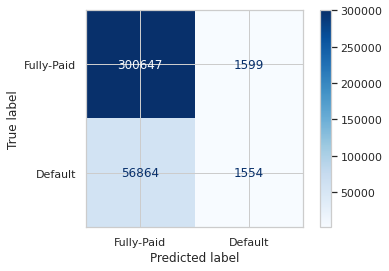

In [ ]:
#Confusion Matrix 그리기
confusion(lr_model)

In [ ]:
print(f"roc_auc_score: {roc_auc_score(y_test, lr_model.predict(X_test)):.3f}")

roc_auc_score: 0.511


In [ ]:
#ROC AUC Value 결과
y_lf_score = lr_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_lf_score)

0.697464562583508

### XGB Classifier

In [43]:
xgb_clf = XGBClassifier(err=0.40)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_xgb_pred = xgb_clf.predict(X_test)

In [44]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_xgb_pred, train=False)

Train Result:
Accuracy Score: 83.80%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0            1.0  accuracy      macro avg  \
precision       0.838199       0.590096  0.837953       0.714148   
recall          0.999514       0.003611  0.837953       0.501563   
f1-score        0.911776       0.007179  0.837953       0.459478   
support    613464.000000  118791.000000  0.837953  732255.000000   

            weighted avg  
precision       0.797950  
recall          0.837953  
f1-score        0.765027  
support    732255.000000  
_______________________________________________
Confusion Matrix: 
 [[613166    298]
 [118362    429]]

Test Result:
Accuracy Score: 83.91%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.839479      0.513995  0.839125       0.676737       0.787107
recall          0.999369      0.003481  0.83912

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


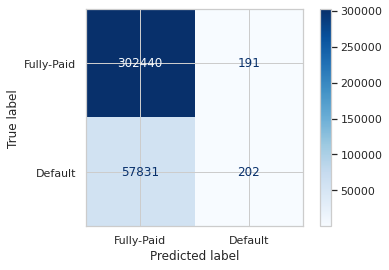

In [45]:
confusion(xgb_clf)

In [46]:
recall_score(y_test, y_test_xgb_pred)

0.003480778177933245

In [47]:
y_xgb_score = xgb_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_xgb_score)

0.6926453492807708

In [42]:
thresholds = [0.05, 0.1, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6,0.7]
get_eval_by_threshold(y_test, y_xgb_score.reshape(-1, 1), thresholds)


임계값:  0.05
오차행렬:
 [[ 27608 275023]
 [   936  57097]]

정확도: 0.2349
정밀도: 0.1719
재현율: 0.9839
F1: 0.2927
AUC: 0.5375

임계값:  0.1
오차행렬:
 [[ 97458 205173]
 [  6379  51654]]

정확도: 0.4134
정밀도: 0.2011
재현율: 0.8901
F1: 0.3281
AUC: 0.6061

임계값:  0.3
오차행렬:
 [[281967  20664]
 [ 46466  11567]]

정확도: 0.8139
정밀도: 0.3589
재현율: 0.1993
F1: 0.2563
AUC: 0.5655

임계값:  0.35
오차행렬:
 [[294079   8552]
 [ 52198   5835]]

정확도: 0.8316
정밀도: 0.4056
재현율: 0.1005
F1: 0.1611
AUC: 0.5361

임계값:  0.4
오차행렬:
 [[299724   2907]
 [ 55642   2391]]

정확도: 0.8377
정밀도: 0.4513
재현율: 0.0412
F1: 0.0755
AUC: 0.5158

임계값:  0.45
오차행렬:
 [[301888    743]
 [ 57302    731]]

정확도: 0.8391
정밀도: 0.4959
재현율: 0.0126
F1: 0.0246
AUC: 0.5051

임계값:  0.5
오차행렬:
 [[302440    191]
 [ 57831    202]]

정확도: 0.8391
정밀도: 0.5140
재현율: 0.0035
F1: 0.0069
AUC: 0.5014

임계값:  0.6
오차행렬:
 [[302631      0]
 [ 58028      5]]

정확도: 0.8391
정밀도: 1.0000
재현율: 0.0001
F1: 0.0002
AUC: 0.5000

임계값:  0.7


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차행렬:
 [[302631      0]
 [ 58033      0]]

정확도: 0.8391
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5000


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0            1.0  accuracy      macro avg  \
precision       0.999987       1.000000  0.999989       0.999993   
recall          1.000000       0.999933  0.999989       0.999966   
f1-score        0.999993       0.999966  0.999989       0.999980   
support    613473.000000  118782.000000  0.999989  732255.000000   

            weighted avg  
precision       0.999989  
recall          0.999989  
f1-score        0.999989  
support    732255.000000  
_______________________________________________
Confusion Matrix: 
 [[613473      0]
 [     8 118774]]

Test Result:
Accuracy Score: 83.91%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.839547      0.516529  0.839113       0.678038       0.787563
recall          0.999227      0.004307  0.8391

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


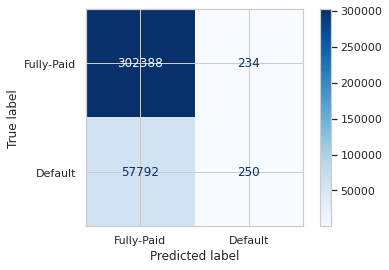

In [ ]:
confusion(rf_clf)

In [ ]:
y_rf_score = rf_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_rf_score)

0.6804335861892217

###모델 설정

In [ ]:
print('Linear Regression AOU_ROC_Value | {:.4f}'.format(roc_auc_score(y_test, y_lf_score)))
print('XGBoost           AOU_ROC_Value | {:.4f}'.format(roc_auc_score(y_test, y_xgb_score)))
print('Random Forest     AOU_ROC_Value | {:.4f}'.format(roc_auc_score(y_test, y_rf_score)))

Linear Regression AOU_ROC_Value | 0.6973
XGBoost           AOU_ROC_Value | 0.6986
Random Forest     AOU_ROC_Value | 0.6804


가장 성능이 좋고, recall과 accracy가 높은 XGBoost로 선정

###XGBoost Importance(2차 전처리)

In [ ]:
X_train, y_train = train.drop('depvar', axis=1), train.depvar

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

ft_importance_value = xgb_clf.feature_importances_
ft_series = pd.Series(ft_importance_value, index = X_train.columns)
ft_top10 = ft_series.sort_values(ascending=False)[:10]

In [ ]:
ft_top10

int_rate                0.321793
home_ownership2         0.055496
term1                   0.052937
dti                     0.051670
fico_range_avg          0.047047
home_ownership6         0.043996
verification_status1    0.038748
emp_length12            0.037478
elapsed_t               0.036569
inq_last_6mths          0.032231
dtype: float32

###Cut OFF(상위 10개 변수 추출)

In [18]:
loans=pd.read_stata("/content/drive/MyDrive/빅데이터 핀테크 전문가/lendingclub.dta")

In [19]:
keep_list = ['int_rate', 'dti', 'term1', 'inq_last_6mths','elapsed_t', 'loan_amnt', 'depvar','home_ownership1',	'home_ownership2',	'home_ownership3',	'home_ownership4',	'home_ownership5',	'home_ownership6',
             'emp_length1', 'emp_length2','emp_length3','emp_length4','emp_length5','emp_length6','emp_length7','emp_length8','emp_length9','emp_length10','emp_length11','emp_length12',
             'verification_status1','verification_status2',	'verification_status3']

drop_list = [col for col in loans.columns if col not in keep_list]
loans.drop(labels = drop_list,axis =1, inplace = True)

In [20]:
train, test = train_test_split(loans, test_size=0.33, random_state=153)
X_train, y_train = train.drop('depvar', axis=1), train.depvar
X_test, y_test = test.drop('depvar', axis=1), test.depvar

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Grid Search

In [ ]:
 #실험할 하이퍼 파라미터 범위와 값 입력
parameters = {'learning_rate': [0.1,0.3], #so called `eta` value
              'max_depth': [3,5,6,7],
              'n_estimators':[100,300,500]}

In [ ]:
#Grid Search 실행
xgb_clf = XGBClassifier(colsample_bytree = 0.5, min_child_weight =3)#XGBoost 최적의 hyperparameter(위 조건 하에)

grid_model = GridSearchCV(xgb_clf, param_grid=parameters,scoring ="roc_auc", cv=3, refit=True,n_jobs=-1)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.5, min_child_weight=3),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [ ]:
#효율이 가장 좋은 하이퍼파라미터 프린트
#효율이 가장 좋은 AUC ROC Value 값 프린트(선택 가능 - Accuray, Recall 등)
print('best parameters : ', grid_model.best_params_)
print('best score : ', grid_model.best_score_)

best parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
best score :  0.6933143016951431


In [ ]:
#가장 효율이 좋았던 하이퍼 파라미터 값으로 모델링
em = grid_model.best_estimator_
train_pred = em.predict(X_train)
tset_pred = em.predict(X_test)

In [ ]:
print_score(y_test, tset_pred, train=False)

Test Result:
Accuracy Score: 83.91%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.839912      0.504673  0.839116       0.672292       0.785970
recall          0.998599      0.007444  0.839116       0.503021       0.839116
f1-score        0.912407      0.014672  0.839116       0.463539       0.767956
support    302631.000000  58033.000000  0.839116  360664.000000  360664.000000
_______________________________________________
Confusion Matrix: 
 [[302207    424]
 [ 57601    432]]



In [ ]:
y_score = em.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

0.6936262817672827

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


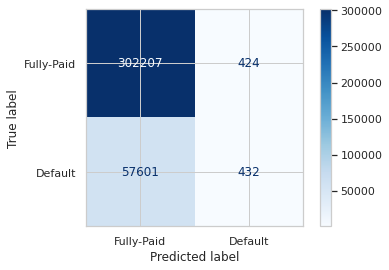

In [ ]:
confusion(em)


In [ ]:
y_xgb_score = xgb_clf.predict_proba(X)[:,1]
roc_auc_score(Y, y_xgb_score)

0.6934468606632752

### XGB Classifier(Grid Search 결과)

In [49]:
xgb_clf = XGBClassifier(learning_rate= 0.1,max_depth= 5, n_estimators= 300, colsample_bytree= 0.5,min_child_weight= 3)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_xgb_pred = xgb_clf.predict(X_test)

In [50]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_xgb_pred, train=False)

Train Result:
Accuracy Score: 83.85%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0            1.0  accuracy      macro avg  \
precision       0.839042       0.637904  0.838507       0.738473   
recall          0.998851       0.010455  0.838507       0.504653   
f1-score        0.911998       0.020573  0.838507       0.466286   
support    613464.000000  118791.000000  0.838507  732255.000000   

            weighted avg  
precision       0.806412  
recall          0.838507  
f1-score        0.767386  
support    732255.000000  
_______________________________________________
Confusion Matrix: 
 [[612759    705]
 [117549   1242]]

Test Result:
Accuracy Score: 83.91%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.840013      0.507870  0.839136       0.673942       0.786569
recall          0.998450      0.008340  0.83913

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


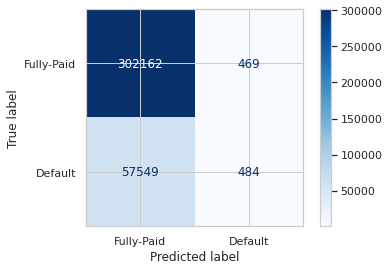

In [51]:
confusion(xgb_clf)

In [52]:
y_xgb_score = xgb_clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_xgb_score)

0.6937937656843509

In [55]:
thresholds = [0.20,0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
get_eval_by_threshold(y_test, y_xgb_score.reshape(-1, 1), thresholds)


임계값:  0.2
오차행렬:
 [[224224  78407]
 [ 27908  30125]]

정확도: 0.7052
정밀도: 0.2776
재현율: 0.5191
F1: 0.3617
AUC: 0.6300

임계값:  0.25
오차행렬:
 [[259740  42891]
 [ 38207  19826]]

정확도: 0.7751
정밀도: 0.3161
재현율: 0.3416
F1: 0.3284
AUC: 0.6000

임계값:  0.3
오차행렬:
 [[280340  22291]
 [ 45809  12224]]

정확도: 0.8112
정밀도: 0.3542
재현율: 0.2106
F1: 0.2642
AUC: 0.5685

임계값:  0.35
오차행렬:
 [[292107  10524]
 [ 51252   6781]]

정확도: 0.8287
정밀도: 0.3919
재현율: 0.1168
F1: 0.1800
AUC: 0.5410

임계값:  0.4
오차행렬:
 [[298447   4184]
 [ 54804   3229]]

정확도: 0.8364
정밀도: 0.4356
재현율: 0.0556
F1: 0.0987
AUC: 0.5209

임계값:  0.45
오차행렬:
 [[301169   1462]
 [ 56732   1301]]

정확도: 0.8386
정밀도: 0.4709
재현율: 0.0224
F1: 0.0428
AUC: 0.5088

임계값:  0.5
오차행렬:
 [[302162    469]
 [ 57549    484]]

정확도: 0.8391
정밀도: 0.5079
재현율: 0.0083
F1: 0.0164
AUC: 0.5034


###분류 결과에 따른 요약

In [ ]:
X_test=pd.DataFrame(X_test)
re_ration = 0.5

In [ ]:
#예측결과와 실제 모두 Full Paid인 경우
count_0_0 = int(X_test[(y_test_xgb_pred==0)&(y_test_xgb_pred==y_test)]['loan_amnt'].count())
loan_0_0 = int(X_test[(y_test_xgb_pred==0)&(y_test_xgb_pred==y_test)]['loan_amnt'].mean())
int_0_0 = float(X_test[(y_test_xgb_pred==0)&(y_test_xgb_pred==y_test)]['int_rate'].mean())

In [ ]:
#상환할 것으로 예측했지만 부도가 난 경우
count_0_1 = X_test[(y_test_xgb_pred==0)&(y_test_xgb_pred!=y_test)]['loan_amnt'].count()
loan_0_1 = int(X_test[(y_test_xgb_pred==0)&(y_test_xgb_pred!=y_test)]['loan_amnt'].mean())
int_0_1 = X_test[(y_test_xgb_pred==0)&(y_test_xgb_pred!=y_test)]['int_rate'].mean()

In [ ]:
#부도가 날 것으로 예상, 실제로 부도가 난 경우
count_1_1 = X_test[(y_test_xgb_pred==1)&(y_test_xgb_pred==y_test)]['loan_amnt'].count()
loan_1_1 = int(X_test[(y_test_xgb_pred==1)&(y_test_xgb_pred==y_test)]['loan_amnt'].mean())
int_1_1 = X_test[(y_test_xgb_pred==1)&(y_test_xgb_pred==y_test)]['int_rate'].mean()

In [ ]:
#부도가 난다고 예측했지만 부도가 나지 않은 경우
count_1_0 = X_test[(y_test_xgb_pred==1)&(y_test_xgb_pred!=y_test)]['loan_amnt'].count()
loan_1_0 = int(X_test[(y_test_xgb_pred==1)&(y_test_xgb_pred!=y_test)]['loan_amnt'].mean())
int_1_0 = X_test[(y_test_xgb_pred==1)&(y_test_xgb_pred!=y_test)]['int_rate'].mean()

In [ ]:
print('상환예측 성공 : 인원 {} | 대출금 평균 {} | 이자 평균 {:.4f} | 총 수익 {:.0f}'.format(count_0_0,loan_0_0,int_0_0,count_0_0*loan_0_0*int_0_0))
print('상환예측 실패 : 인원 {} | 대출금 평균 {} | 이자 평균 {:.4f} | 총 손실 {:.0f}'.format(count_0_1,loan_0_1,int_0_1,count_0_1*loan_0_1*re_ration))
print('부도예측 성공 : 인원 {} | 대출금 평균 {} | 이자 평균 {:.4f} | 손실방지 {:.0f}'.format(count_1_1,loan_1_1,int_1_1,count_1_1*loan_1_1*re_ration))
print('부도예측 실패 : 인원 {} | 대출금 평균 {} | 이자 평균 {:.4f} | 잠재수익 손해 {:.0f}'.format(count_1_0,loan_1_0,int_1_0,count_1_0*loan_1_0*int_1_0))

상환예측 성공 : 인원 302162 | 대출금 평균 13547 | 이자 평균 0.1219 | 총 수익 499085343
상환예측 실패 : 인원 57549 | 대출금 평균 14098 | 이자 평균 0.1477 | 총 손실 2046694307
부도예측 성공 : 인원 484 | 대출금 평균 16158 | 이자 평균 0.2514 | 손실방지 3910236
부도예측 실패 : 인원 469 | 대출금 평균 16342 | 이자 평균 0.2494 | 잠재수익 손해 1911630


In [ ]:
revenue = (count_0_0*loan_0_0*int_0_0)+(count_1_1*loan_1_1*re_ration)
loss = (count_0_1*loan_0_1*re_ration)+(count_1_0*loan_1_0*int_1_0)

In [ ]:
print('총 수익 {:.0f}$, 총 손해 {:.0f}$, 순수익 {:.0f}$'.format(revenue,loss,revenue - loss))

총 수익 502995579$, 총 손해 407574531$, 순수익 95421048$
